# Brief about dataset

## Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.

The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

## This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes which represents our target values:

- Normal
- Suspect
- Pathological

# Columns info

- 'baseline value'- FHR baseline (beats per minute)
- 'accelerations'- Number of accelerations per second
- 'fetal_movement'- Number of fetal movements per second
- 'uterine_contractions'- Number of uterine contractions per second
- 'light_decelerations'- Number of light decelerations per second
- 'severe_decelerations'- Number of severe decelerations per second
- 'prolongued_decelerations'- Number of prolonged decelerations per second
- 'abnormal_short_term_variability'- Percentage of time with abnormal short term variability
- 'mean_value_of_short_term_variability'- Mean value of short term variability
- 'percentage_of_time_with_abnormal_long_term_variability'- Percentage of time with abnormal long term variability
- 'mean_value_of_long_term_variability'- Mean value of long term variability
- 'histogram_width'- Width of FHR histogram
- 'histogram_min'- Minimum (low frequency) of FHR histogram
- 'histogram_max'- Maximum (high frequency) of FHR histogram
- 'histogram_number_of_peaks'- Number of histogram peaks
- 'histogram_number_of_zeroes'- Number of histogram zeros
- 'histogram_mode'- Histogram mode
- 'histogram_mean'- Histogram mean
- 'histogram_median'- Histogram median
- 'histogram_variance'- Histogram variance
- 'histogram_tendency'- Histogram tendency

## Important Concepts
### Fetal Heart Rate:
Healthcare providers measure fetal heart rate by the number of fetal (baby) heartbeats per minute (BPM) during pregnancy. This measurement helps healthcare providers determine the well-being of the fetus during prenatal visits or labor.

# Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, mean_absolute_error , r2_score , mean_squared_error, mean_absolute_percentage_error
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")


C:\Users\YoserWalha\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Exploring data

In [10]:
data = pd.read_csv('./fetal_health.csv')
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [12]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [13]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [14]:
# getting the dataset's rows and columns by invoking the shape() function
# data.shape

In [15]:
#Check types for all the columns using dtypes
data.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [16]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

# Correlated features

<AxesSubplot: >

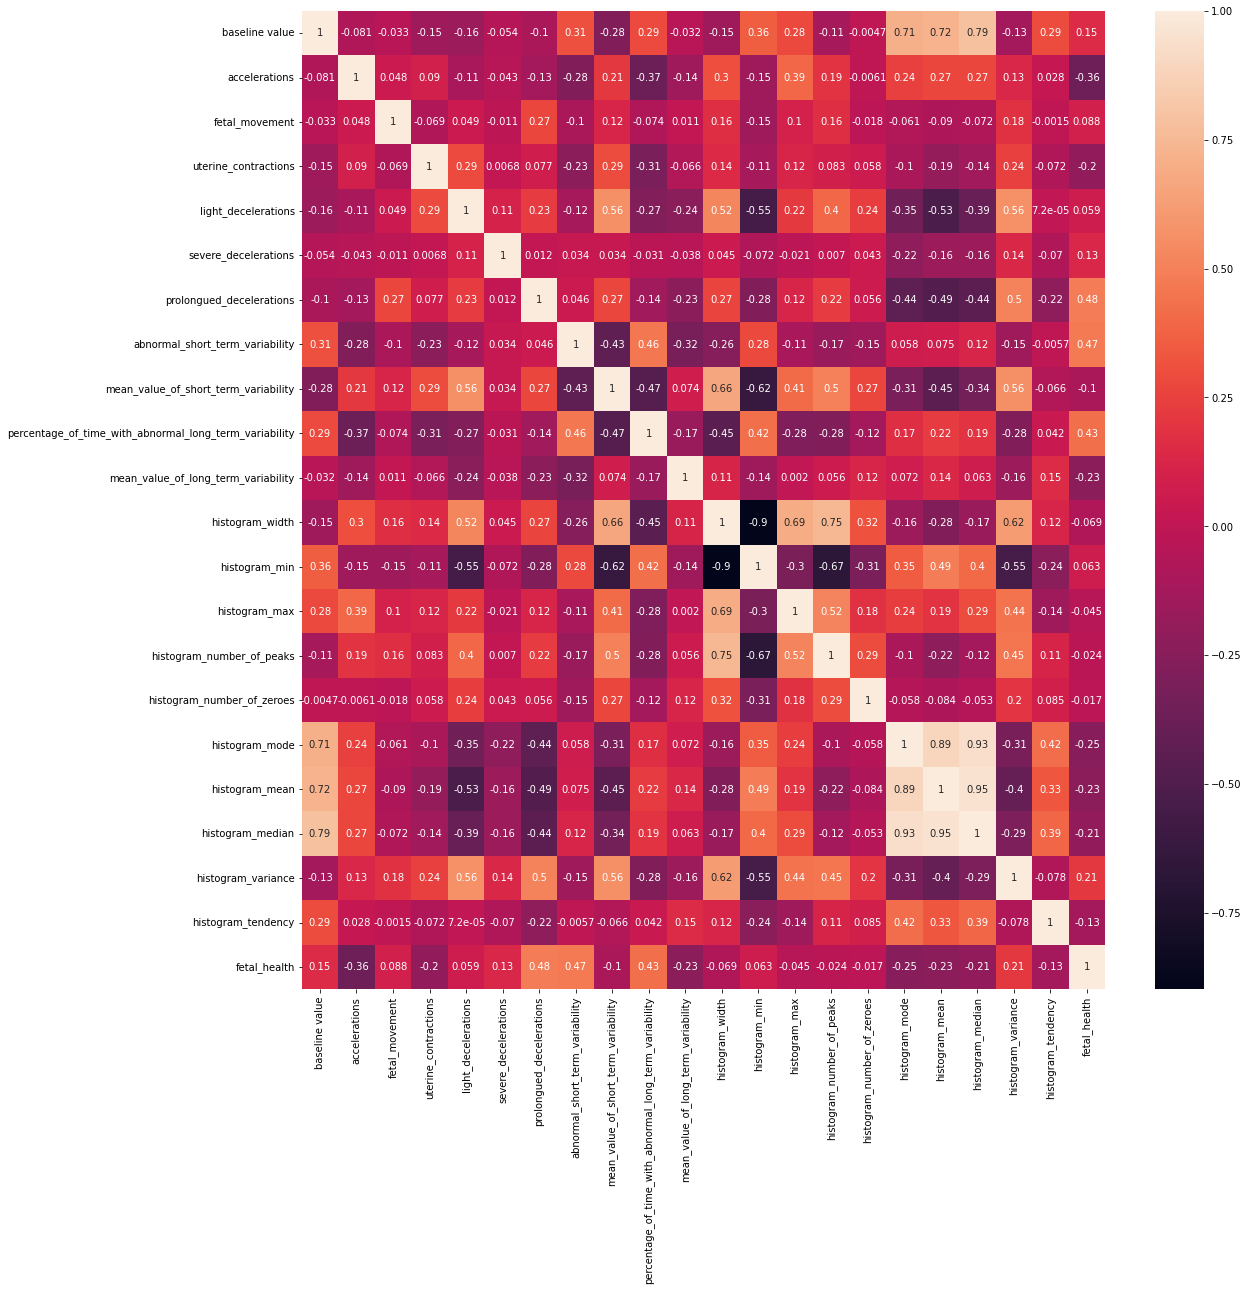

In [17]:
plt.subplots(figsize = (18, 18))
sns.heatmap(data.corr(), annot = True)

In [18]:
correlated_features = set()
correlation_matrix = data.corr()

In [19]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [20]:
len(correlated_features)

5

In [21]:
print(correlated_features)

{'histogram_min', 'histogram_mean', 'histogram_number_of_peaks', 'histogram_median', 'histogram_mode'}


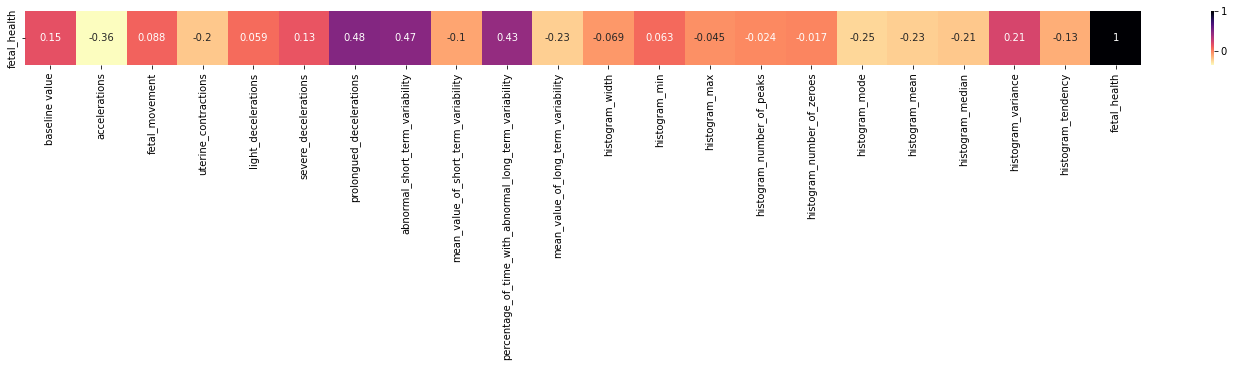

In [22]:
plt.subplots(figsize=(25,1))
sns.heatmap(correlation_matrix.sort_values(by=["fetal_health"], ascending=False).head(1),annot=True, cmap="magma_r")
plt.show()

# Visualization

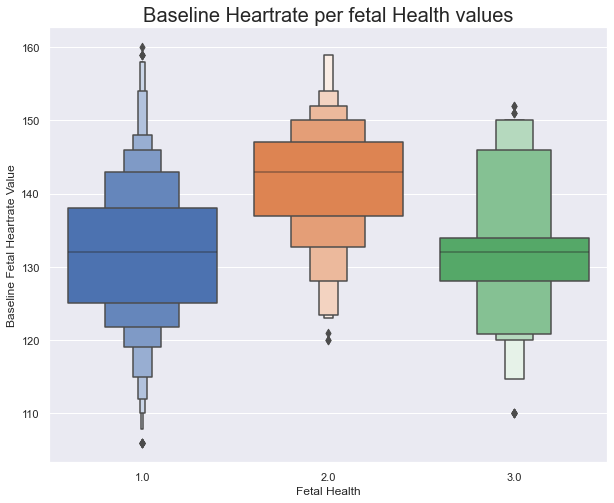

In [23]:
sns.set(font_scale=1)
plt.figure(figsize=(10,8))
g = sns.boxenplot(x='fetal_health', y='baseline value', data=data,
             saturation=1.5)
g.set_xlabel('Fetal Health')
g.set_ylabel('Baseline Fetal Heartrate Value')
g.set_title('Baseline Heartrate per fetal Health values', fontsize=20)
plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `hue`

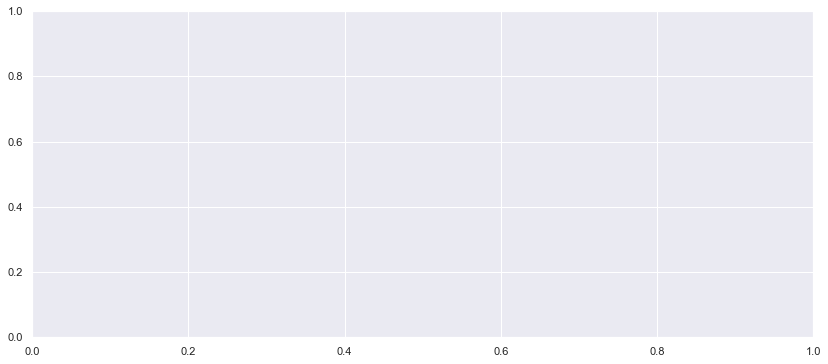

In [24]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(data["baseline value"], alpha=0.5,shade = True, ax = ax, hue=data['fetal_health'], palette="coolwarm")
plt.title('Average Heart Rate Distribution', fontsize = 18)
ax.set_xlabel("FHR")
ax.set_ylabel("Frequency")

ax.legend(['Pathological','Suspect','Normal'])

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(data["accelerations"], alpha=0.5,shade = True, ax = ax, hue=data['fetal_health'], palette="coolwarm")
plt.title('The relationship of Acceleration of heath beat with target ', fontsize = 18)
ax.set_xlabel("Accelerations")
ax.set_ylabel("Frequency")

ax.legend(['Pathological','Suspect','Normal'])

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(data["uterine_contractions"], alpha=0.5,shade = True, ax = ax, hue=data['fetal_health'], palette="coolwarm")
plt.title('The Relationship of Uterine Contractions With the Health of the Fetus', fontsize = 18)
ax.set_xlabel("Uterine Contractions")
ax.set_ylabel("Frequency")


ax.legend(['Pathological','Suspect','Normal'])

plt.show()

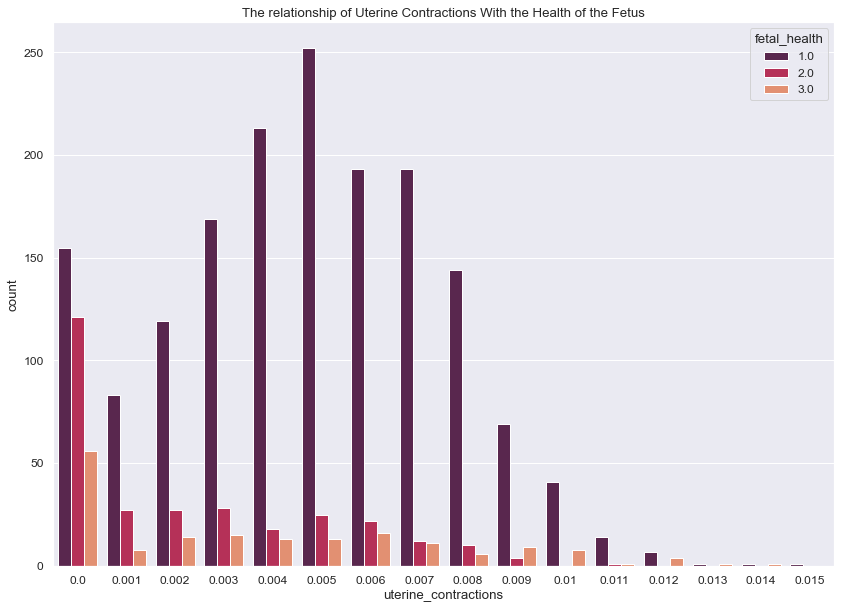

In [25]:
plt.figure(figsize=(14,10))
sns.set_theme(style="darkgrid", font_scale = 1.1)
g =sns.countplot(data=data, x='uterine_contractions', hue='fetal_health', palette='rocket').set_title('The relationship of Uterine Contractions With the Health of the Fetus');

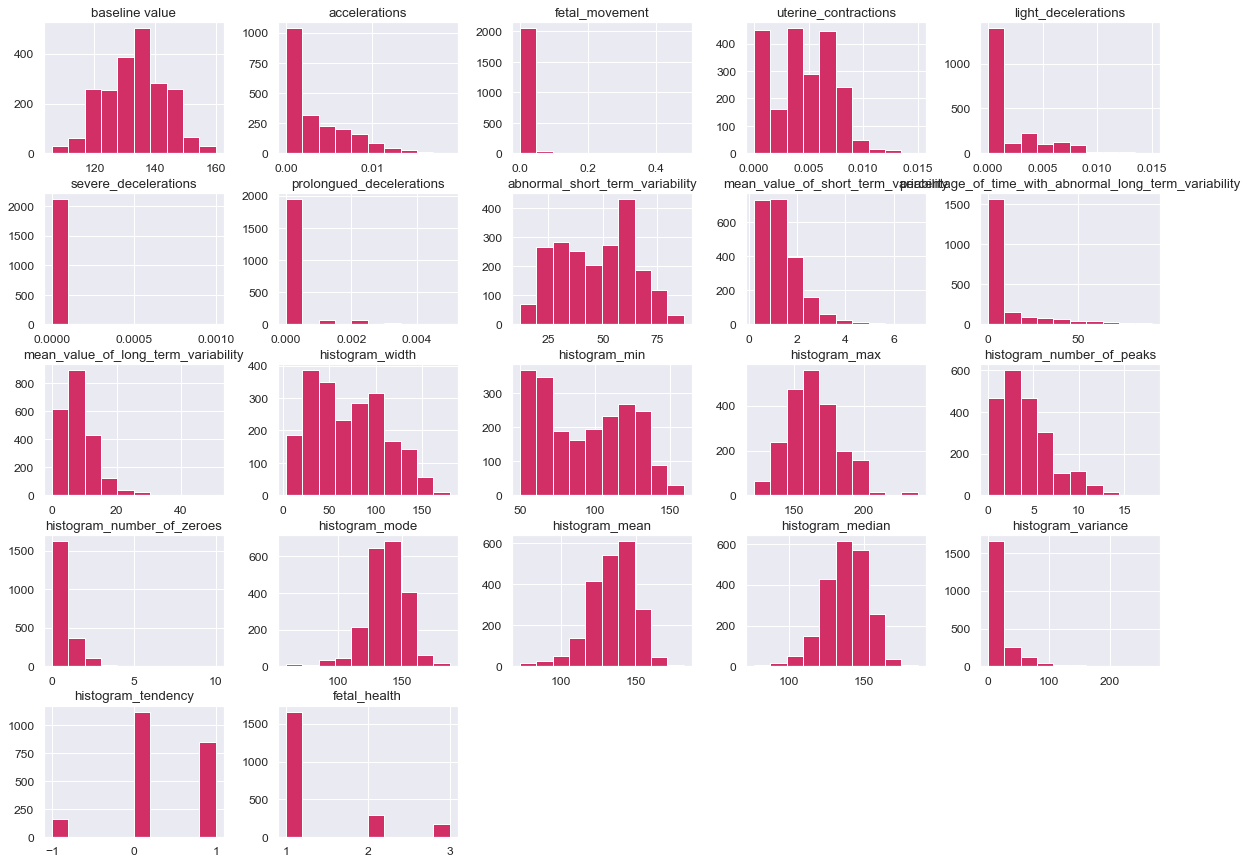

In [26]:
# visualizing all as histogram
data.hist(figsize=(20,15),color='#d12f65')
plt.show()

# Treating imbalanced data

<AxesSubplot: title={'center': 'Data Before sampling'}>

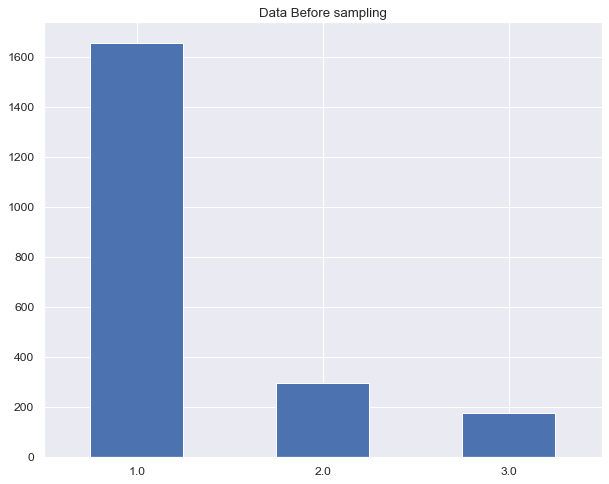

In [27]:
#Before resampling
plt.figure(figsize=(10 ,8 ))
plt.title('Data Before sampling')
data['fetal_health'].value_counts().plot.bar(rot=0)

In [28]:
data_activity_0 = data[data['fetal_health'] == 1.0]
data_activity_else = data[data['fetal_health'] != 1.0]

data_activity_0 = data_activity_0.sample(n=400, random_state=42)
data = pd.concat([data_activity_0, data_activity_else])

<AxesSubplot: title={'center': 'Data afetr sampling'}>

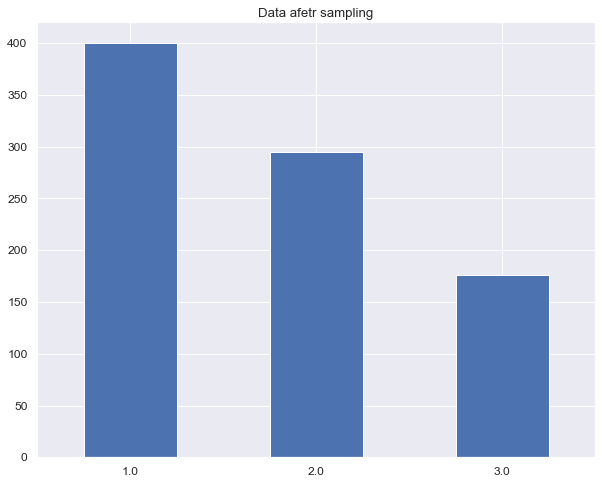

In [29]:
plt.figure(figsize=(10 ,8 ))
plt.title('Data afetr sampling')
data['fetal_health'].value_counts().plot.bar(rot=0)

# Checking for outliers

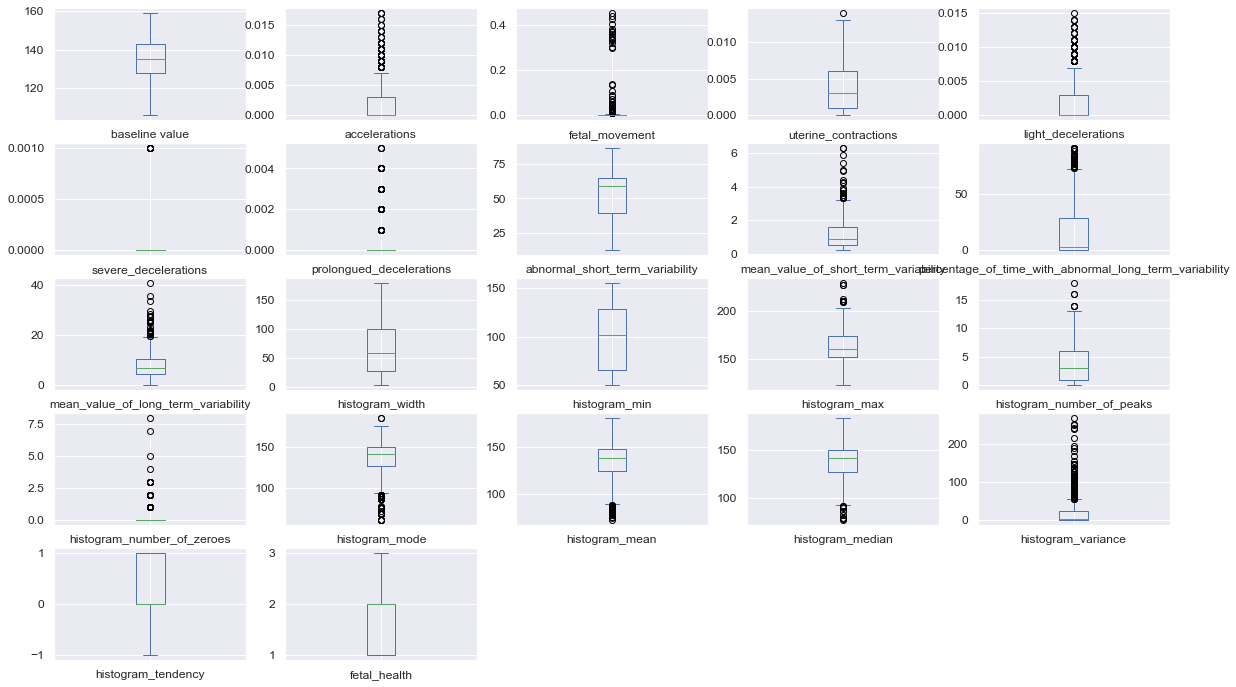

In [30]:
data.plot(kind = "box" , subplots = True , layout= (5,5), figsize =(20,12) )
plt.show()

Text(0.5, 1.0, 'Distributions before removing outliers')

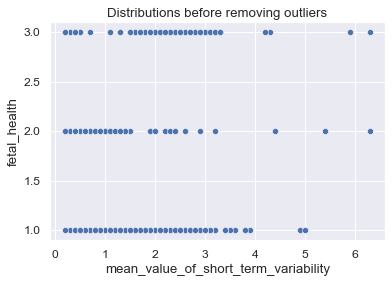

In [31]:
sns.scatterplot(x=data['mean_value_of_short_term_variability'],y=data['fetal_health'])
plt.title('Distributions before removing outliers')

In [32]:
data[data['mean_value_of_short_term_variability']>=4.5].shape

(6, 22)

In [33]:
data=data[data['mean_value_of_short_term_variability']<4.5]

Text(0.5, 1.0, 'Distributions after removing outliers')

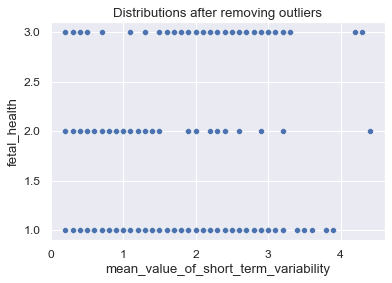

In [34]:
sns.scatterplot(x=data['mean_value_of_short_term_variability'],y=data['fetal_health'])
plt.title('Distributions after removing outliers')

Text(0.5, 1.0, 'Distributions before removing outliers')

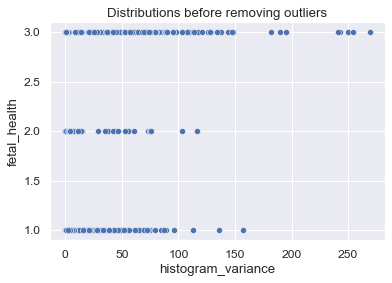

In [35]:
sns.scatterplot(x=data['histogram_variance'],y=data['fetal_health'])
plt.title('Distributions before removing outliers')

In [36]:
data[data['histogram_variance']>=100].shape

(35, 22)

In [37]:
data=data[data['histogram_variance']<100]

Text(0.5, 1.0, 'Distributions after removing outliers')

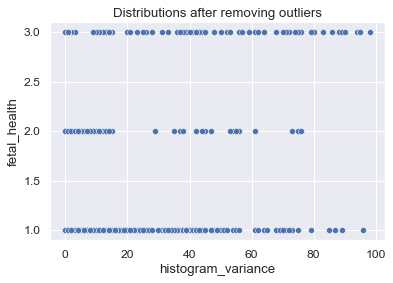

In [38]:
sns.scatterplot(x=data['histogram_variance'],y=data['fetal_health'])
plt.title('Distributions after removing outliers')

Text(0.5, 1.0, 'Distributions before removing outliers')

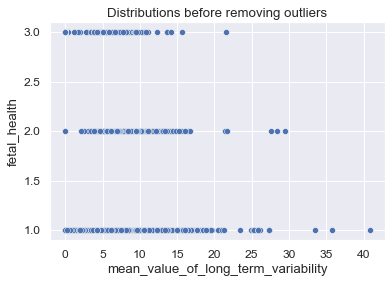

In [39]:
sns.scatterplot(x=data['mean_value_of_long_term_variability'],y=data['fetal_health'])
plt.title('Distributions before removing outliers')

In [40]:
data[data['mean_value_of_long_term_variability']>=28].shape

(5, 22)

In [41]:
data=data[data['mean_value_of_long_term_variability']<28]

Text(0.5, 1.0, 'Distributions after removing outliers')

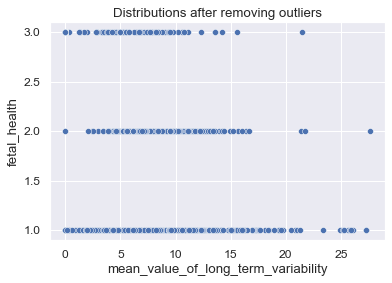

In [42]:
sns.scatterplot(x=data['mean_value_of_long_term_variability'],y=data['fetal_health'])
plt.title('Distributions after removing outliers')

Text(0.5, 1.0, 'Distributions before removing outliers')

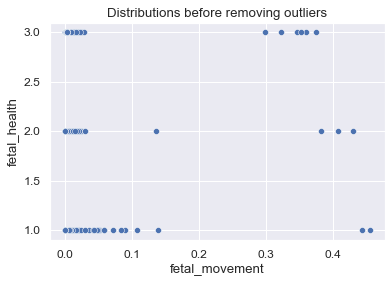

In [43]:
sns.scatterplot(x=data['fetal_movement'],y=data['fetal_health'])
plt.title('Distributions before removing outliers')

In [44]:
data[data['fetal_movement']>=0.06].shape

(17, 22)

In [45]:
data=data[data['fetal_movement']<0.06]

Text(0.5, 1.0, 'Distributions after removing outliers')

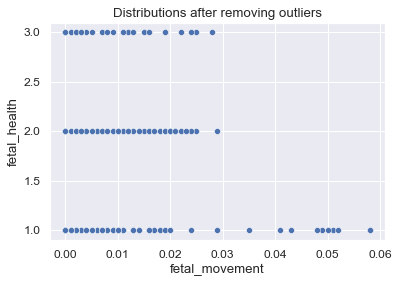

In [46]:
sns.scatterplot(x=data['fetal_movement'],y=data['fetal_health'])
plt.title('Distributions after removing outliers')

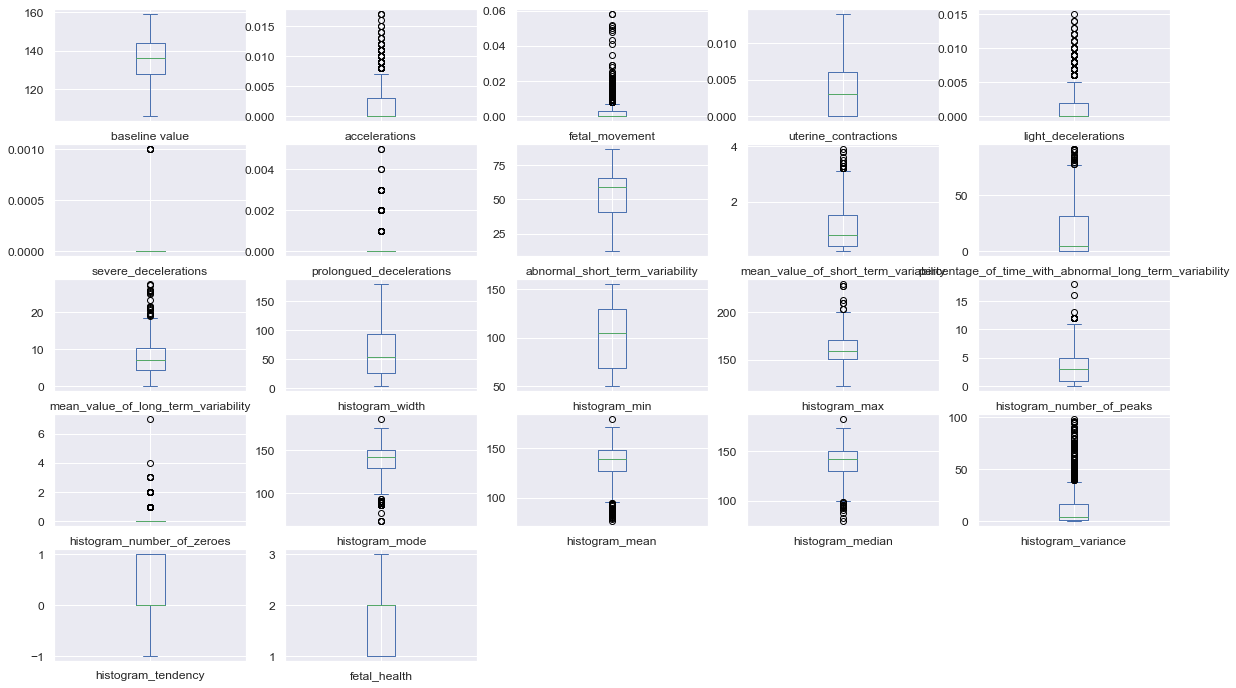

In [47]:
data.plot(kind = "box" , subplots = True , layout= (5,5), figsize =(20,12) )
plt.show()

# Splitting data

In [48]:
x = data.drop(['fetal_health'], axis=1).values
y = data['fetal_health'].values

In [49]:
# Create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
x_train.shape

(646, 21)

In [51]:
x_test.shape

(162, 21)

In [52]:
y_train.shape

(646,)

In [53]:
x_train.shape

(646, 21)

# Scalling

In [54]:
# Scale train/ test predictors based on training data
ro_scaler = RobustScaler().fit(x_train)
x_train_scaled = ro_scaler.transform(x_train)
x_test_scaled = ro_scaler.transform(x_test)

In [55]:
def resultsSummarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    sensitivity = recall_score(y_true,y_pred,average='macro')
    
    
    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))
    print(f'Sensitvity: ' + '{:.4%}'.format(sensitivity))

# Modeling and evaluation

# Logistic regression

In [56]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [57]:
lr.score(x_train , y_train)

0.8034055727554179

In [58]:
lr.score(x_test , y_test)

0.7839506172839507

In [59]:
lr2=LogisticRegression()

In [60]:
lr2.fit(x_train_scaled,y_train)


LogisticRegression()

In [61]:
lr2.score(x_train_scaled , y_train)

0.8823529411764706

In [62]:
lr2.score(x_test_scaled , y_test)

0.8333333333333334

In [63]:
y_pred_lr = lr.predict(x_test_scaled)

In [64]:
resultsSummarizer(y_test, y_pred_lr)

Accuracy Score: 55.5556%
Precision Score: 55.5837%
Recall Score: 61.5226%
F_1 Score: 51.1875%
Sensitvity: 61.5226%


In [65]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         1.0       0.88      0.64      0.74        81
         2.0       0.44      0.20      0.28        54
         3.0       0.35      1.00      0.51        27

    accuracy                           0.56       162
   macro avg       0.56      0.62      0.51       162
weighted avg       0.65      0.56      0.55       162



# KNeighbours classifier

In [66]:
k1=KNeighborsClassifier(n_neighbors=4)
k1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [67]:
k1.score(x_train,y_train)

0.868421052631579

In [68]:
k1.score(x_test,y_test)

0.845679012345679

In [69]:
y_pred=lr.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:10]

,y_Test,y_pred
0,2.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,3.0,2.0
5,3.0,3.0
6,1.0,1.0
7,1.0,1.0
8,2.0,2.0
9,3.0,2.0


In [70]:
k2 = KNeighborsClassifier(n_neighbors=5)
k2.fit(x_train_scaled, y_train)
y_pred_knn = k2.predict(x_test_scaled)

In [71]:
resultsSummarizer(y_test, y_pred_knn)

Accuracy Score: 85.1852%
Precision Score: 86.0899%
Recall Score: 84.5679%
F_1 Score: 85.0260%
Sensitvity: 84.5679%


In [72]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         1.0       0.92      0.85      0.88        81
         2.0       0.75      0.87      0.80        54
         3.0       0.92      0.81      0.86        27

    accuracy                           0.85       162
   macro avg       0.86      0.85      0.85       162
weighted avg       0.86      0.85      0.85       162



# Decision tree

In [73]:
dt=DecisionTreeClassifier(max_depth=14)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=14)

In [74]:
dt.score(x_train,y_train)

1.0

In [75]:
dt.score(x_test,y_test)

0.8580246913580247

In [76]:
dt.fit(x_train_scaled, y_train)
y_pred_tree = dt.predict(x_test_scaled)

In [77]:
resultsSummarizer(y_test, y_pred_tree)

Accuracy Score: 85.8025%
Precision Score: 85.2714%
Recall Score: 86.4198%
F_1 Score: 85.7712%
Sensitvity: 86.4198%


In [78]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

         1.0       0.91      0.85      0.88        81
         2.0       0.79      0.85      0.82        54
         3.0       0.86      0.89      0.87        27

    accuracy                           0.86       162
   macro avg       0.85      0.86      0.86       162
weighted avg       0.86      0.86      0.86       162



# Random forest

In [79]:
rf=RandomForestClassifier(max_depth=5)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [80]:
rf.score(x_train,y_train)

0.9241486068111455

In [81]:
rf.score(x_test,y_test)

0.8580246913580247

In [82]:
rfst = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfst.fit(x_train_scaled, y_train)
y_pred_rfst = rfst.predict(x_test_scaled)

In [83]:
resultsSummarizer(y_pred_rfst, y_test)

Accuracy Score: 91.3580%
Precision Score: 90.3292%
Recall Score: 90.3354%
F_1 Score: 90.2429%
Sensitvity: 90.3354%


In [84]:
print(classification_report(y_test, y_pred_rfst))

              precision    recall  f1-score   support

         1.0       0.96      0.91      0.94        81
         2.0       0.86      0.94      0.90        54
         3.0       0.88      0.85      0.87        27

    accuracy                           0.91       162
   macro avg       0.90      0.90      0.90       162
weighted avg       0.92      0.91      0.91       162



 ## getting best gamma and c

In [85]:
C_grid = 0.02*np.arange(1,20)
gamma_grid = 0.02*np.arange(1,50)
print(C_grid,gamma_grid)
parameters = {'C': C_grid, 'gamma' : gamma_grid}
gridCV = GridSearchCV(SVC(kernel='rbf'), parameters, n_jobs=-1)             
gridCV.fit(x_train,y_train)
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']


[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38] [0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98]


In [86]:
print("Best C "+str(best_C))
print("Best Gamma "+str(best_gamma))

Best C 0.38
Best Gamma 0.02


# Linear svc

In [87]:
lin = SVC(kernel='linear',C=best_C,gamma=best_gamma)
lin.fit(x_train, y_train)

SVC(C=0.38, gamma=0.02, kernel='linear')

In [88]:
y_pred_Linear = lin.predict(x_test)
print(classification_report(y_test, y_pred_Linear))

              precision    recall  f1-score   support

         1.0       0.87      0.85      0.86        81
         2.0       0.71      0.76      0.73        54
         3.0       0.84      0.78      0.81        27

    accuracy                           0.81       162
   macro avg       0.81      0.80      0.80       162
weighted avg       0.81      0.81      0.81       162



In [89]:
resultsSummarizer(y_pred_Linear, y_test)

Accuracy Score: 80.8642%
Precision Score: 79.6296%
Recall Score: 80.6771%
F_1 Score: 80.0778%
Sensitvity: 80.6771%


# rbf Svc

In [90]:
rbf = SVC(kernel='rbf',C=1,gamma=0.6)
rbf.fit(x_train, y_train)

y_pred_RBF = rbf.predict(x_test)
print(classification_report(y_test, y_pred_RBF))

              precision    recall  f1-score   support

         1.0       0.51      1.00      0.67        81
         2.0       0.67      0.04      0.07        54
         3.0       0.00      0.00      0.00        27

    accuracy                           0.51       162
   macro avg       0.39      0.35      0.25       162
weighted avg       0.48      0.51      0.36       162



In [91]:
resultsSummarizer(y_test, y_pred_RBF)

Accuracy Score: 51.2346%
Precision Score: 39.2034%
Recall Score: 34.5679%
F_1 Score: 24.8392%
Sensitvity: 34.5679%


In [92]:
poly = SVC(kernel='poly',degree=3)
poly.fit(x_train, y_train)
y_pred_Poly = poly.predict(x_test)
print(classification_report(y_test, y_pred_Poly))

              precision    recall  f1-score   support

         1.0       0.90      0.86      0.88        81
         2.0       0.74      0.83      0.78        54
         3.0       0.78      0.67      0.72        27

    accuracy                           0.82       162
   macro avg       0.81      0.79      0.79       162
weighted avg       0.83      0.82      0.82       162



In [93]:
resultsSummarizer(y_test, y_pred_Poly)

Accuracy Score: 82.0988%
Precision Score: 80.5917%
Recall Score: 78.8066%
F_1 Score: 79.4371%
Sensitvity: 78.8066%


# GaussianNB 

In [94]:
GNB = GaussianNB()
GNB.fit(x_train,y_train)
y_pred_Gauss = GNB.predict(x_test)

In [95]:
resultsSummarizer(y_test, y_pred_Gauss)

Accuracy Score: 77.1605%
Precision Score: 73.1580%
Recall Score: 72.4280%
F_1 Score: 71.6855%
Sensitvity: 72.4280%


# Evaluation of models according to training accuracy

In [96]:
classifier_list = [lr, k2, dt, rf, lin,rbf,poly]
clf_name_list = ['Logistic Regression', 'KNeighborsClassifier', 'Decision Tree', 'Random Forest', 'svc_linear','rbf_svc','poly_svc']

for clf in classifier_list:
    clf.fit(x_train,y_train)

In [97]:
train_acc_list = []
test_acc_list = []

for clf,name in zip(classifier_list,clf_name_list):
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train, y_train)}')
    print(f'Test Score: {clf.score(x_test, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print('======================================================')

Using model: Logistic Regression
Trainning Score: 0.8034055727554179
Test Score: 0.7839506172839507
Acc Train: 0.8034055727554179
Acc Test: 0.7839506172839507
Using model: KNeighborsClassifier
Trainning Score: 0.8761609907120743
Test Score: 0.8518518518518519
Acc Train: 0.8761609907120743
Acc Test: 0.8518518518518519
Using model: Decision Tree
Trainning Score: 1.0
Test Score: 0.8518518518518519
Acc Train: 1.0
Acc Test: 0.8518518518518519
Using model: Random Forest
Trainning Score: 0.9380804953560371
Test Score: 0.8641975308641975
Acc Train: 0.9380804953560371
Acc Test: 0.8641975308641975
Using model: svc_linear
Trainning Score: 0.8808049535603715
Test Score: 0.808641975308642
Acc Train: 0.8808049535603715
Acc Test: 0.808641975308642
Using model: rbf_svc
Trainning Score: 1.0
Test Score: 0.5123456790123457
Acc Train: 1.0
Acc Test: 0.5123456790123457
Using model: poly_svc
Trainning Score: 0.8219814241486069
Test Score: 0.8209876543209876
Acc Train: 0.8219814241486069
Acc Test: 0.820987654

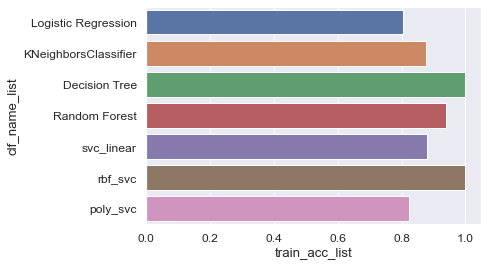

In [98]:
clf_name_list = np.array([clf_name_list]).reshape(7,1)
train_acc_list = np.array([train_acc_list]).reshape(7,1)
df = pd.DataFrame(clf_name_list,columns=["clf_name_list"])
df["train_acc_list"] = train_acc_list
sns.barplot(data=df,y="clf_name_list",x="train_acc_list");

In [99]:
# Important features 

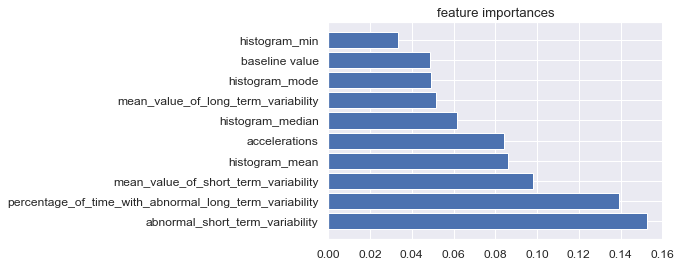

In [100]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
    
rfst = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfst.fit(x_train,y_train)
f_importances(abs(rfst.feature_importances_), features_names, top=10)

# The end